In [31]:

import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation



In [32]:

class GridWorldEnv:
    def __init__(self):
        self.grid_size = 5
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 4]
        self.action_space = [0,1,2,3] # 0=up, 1=down, 2=left, 3=right 
        self.observation_space = (self.grid_size, self.grid_size)
        self.reset()
    def reset(self):
        self.agent_pos = [0, 0]
        return self.agent_pos
    def step(self, action):
        if action == 0 and self.agent_pos[0] > 0: # up
            self.agent_pos[0] -= 1
        elif action == 1 and self.agent_pos[0] < self.grid_size - 1: # down
            self.agent_pos[0] += 1
        elif action == 2 and self.agent_pos[1] > 0: # left
            self.agent_pos[1] -= 1
        elif action == 3 and self.agent_pos[1] < self.grid_size - 1: # right
            self.agent_pos[1] += 1
        
        reward = -1
        done = False
        if self.agent_pos == self.goal_pos:
            reward = 10
            done = True
        
        return self.agent_pos, reward, done, {}
    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size))
        grid[self.agent_pos[0], self.agent_pos[1]] = 1  
        grid[self.goal_pos[0], self.goal_pos[1]] = 2    
        plt.imshow(grid, cmap='viridis')
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        plt.grid(True)
        plt.show()


In [33]:

class RandomAgent:
    def __init__(self, action_space):
        self.action_space = action_space
    
    def act(self, observation):
        return random.choice(self.action_space)

In [34]:

def run_animated_episode(env, agent, max_steps=30, delay=0.5):
    env.reset()
    plt.ion()
    fig, ax = plt.subplots(figsize=(8, 8))
    
    total_reward = 0
    path = [env.agent_pos.copy()]
    
    for step in range(max_steps):
        # Action et step
        action = agent.act(env.agent_pos)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        path.append(obs.copy())
        
        # Visualisation
        ax.clear()
        grid = np.zeros((env.grid_size, env.grid_size))
        
        # Marquer le chemin parcouru
        for pos in path[:-1]:
            grid[pos[0], pos[1]] = 0.3
        
        # Agent actuel et goal
        grid[obs[0], obs[1]] = 1  # Agent
        grid[env.goal_pos[0], env.goal_pos[1]] = 2  # Goal
        
        ax.imshow(grid, cmap='viridis', vmin=0, vmax=2)
        ax.set_title(f'Step: {step+1}/{max_steps} | Reward Total: {total_reward} | Action: {action}')
        ax.set_xticks(range(env.grid_size))
        ax.set_yticks(range(env.grid_size))
        ax.grid(True)
        
        plt.pause(delay)
        
        if done:
            ax.set_title(f'TERMINÉ! Steps: {step+1} | Reward Total: {total_reward}')
            plt.pause(2)
            break
    
    plt.ioff()
    plt.show()
    return path, total_reward

In [35]:

def create_step_by_step_plots(env, agent, max_steps=16):
    env.reset()
    
    # Calculer la grille de subplots
    rows = int(np.ceil(np.sqrt(max_steps)))
    cols = int(np.ceil(max_steps / rows))
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()
    
    total_reward = 0
    path = [env.agent_pos.copy()]
    
    for step in range(max_steps):
        ax = axes[step]
        
        # Action et step
        action = agent.act(env.agent_pos)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        path.append(obs.copy())
        
        # Créer grille visuelle
        grid = np.zeros((env.grid_size, env.grid_size))
        
        # Marquer le chemin parcouru
        for pos in path[:-1]:
            grid[pos[0], pos[1]] = 0.3
        
        # Position actuelle et goal
        grid[obs[0], obs[1]] = 1
        grid[env.goal_pos[0], env.goal_pos[1]] = 2
        
        ax.imshow(grid, cmap='viridis', vmin=0, vmax=2)
        ax.set_title(f'Step {step+1}\nR={reward}')
        ax.set_xticks(range(env.grid_size))
        ax.set_yticks(range(env.grid_size))
        ax.grid(True)
        
        if done:
            ax.set_title(f'Step {step+1}\nGOAL! R={reward}')
            # Masquer les axes inutilisés
            for i in range(step+1, len(axes)):
                axes[i].axis('off')
            break
    
    plt.tight_layout()
    plt.show()
    return path, total_reward

In [36]:

class GridWorldAnimation:
    def __init__(self, env, agent, max_steps=50, interval=500):
        self.env = env
        self.agent = agent
        self.max_steps = max_steps
        self.interval = interval
        self.step_count = 0
        self.total_reward = 0
        self.done = False
        self.path = []

        self.env.reset()
        self.path.append(self.env.agent_pos.copy())
        
        
        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        
    def animate_step(self, frame):
        if self.step_count >= self.max_steps or self.done:
            return []
        
        
        action = self.agent.act(self.env.agent_pos)
        obs, reward, done, info = self.env.step(action)
        
        self.total_reward += reward
        self.step_count += 1
        self.done = done
        self.path.append(obs.copy())
        
        # Mettre à jour visualisation
        self.ax.clear()
        grid = np.zeros((self.env.grid_size, self.env.grid_size))
        
      
        for pos in self.path[:-1]:
            grid[pos[0], pos[1]] = 0.3
            
        
        grid[obs[0], obs[1]] = 1
        grid[self.env.goal_pos[0], self.env.goal_pos[1]] = 2
        
        self.ax.imshow(grid, cmap='viridis', vmin=0, vmax=2)
        
        status = "TERMINÉ!" if done else "En cours"
        self.ax.set_title(f'{status} | Step: {self.step_count}/{self.max_steps} | Reward: {self.total_reward}')
        self.ax.set_xticks(range(self.env.grid_size))
        self.ax.set_yticks(range(self.env.grid_size))
        self.ax.grid(True)
        
        return []
    
    def create_animation(self):
        anim = FuncAnimation(self.fig, self.animate_step, 
                           frames=self.max_steps, interval=self.interval, 
                           repeat=False, blit=False)
        return anim

In [37]:

def run_multiple_episodes(env, agent, num_episodes=10, max_steps=100):
    episode_rewards = []
    episode_steps = []
    success_count = 0
    
    for episode in range(num_episodes):
        env.reset()
        total_reward = 0
        steps_taken = 0
        done = False
        
        while not done and steps_taken < max_steps:
            action = agent.act(env.agent_pos)
            obs, reward, done, info = env.step(action)
            total_reward += reward
            steps_taken += 1
        
        episode_rewards.append(total_reward)
        episode_steps.append(steps_taken)
        
        if done:
            success_count += 1
            
        if episode % 5 == 0:
            print(f"Episode {episode+1}: Reward={total_reward}, Steps={steps_taken}, Done={done}")
    

    avg_reward = np.mean(episode_rewards)
    avg_steps = np.mean(episode_steps)
    success_rate = success_count / num_episodes * 100
    
    print(f"\n=== STATISTIQUES FINALES ===")
    print(f"Épisodes réussis: {success_count}/{num_episodes} ({success_rate:.1f}%)")
    print(f"Reward moyen: {avg_reward:.2f}")
    print(f"Steps moyens: {avg_steps:.2f}")
    
  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(episode_rewards)
    ax1.set_title('Rewards par épisode')
    ax1.set_xlabel('Épisode')
    ax1.set_ylabel('Reward total')
    ax1.grid(True)
    
    ax2.plot(episode_steps)
    ax2.set_title('Steps par épisode')
    ax2.set_xlabel('Épisode')
    ax2.set_ylabel('Nombre de steps')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return episode_rewards, episode_steps

In [38]:

env = GridWorldEnv()
agent = RandomAgent(env.action_space)



print(f"Taille de la grille: {env.grid_size}x{env.grid_size}")
print(f"Position départ: {env.agent_pos}")
print(f"Position goal: {env.goal_pos}")
print(f"Actions possibles: {env.action_space}")


env.reset()
obs, reward, done, info = env.step(1)  
print(f"Après action 1 (down): pos={obs}, reward={reward}, done={done}")

Taille de la grille: 5x5
Position départ: [0, 0]
Position goal: [4, 4]
Actions possibles: [0, 1, 2, 3]
Après action 1 (down): pos=[1, 0], reward=-1, done=False


=== ANIMATION TEMPS RÉEL ===
Nombre de steps: 25
Délai entre steps: 0.1s
Démarrage de l'animation...


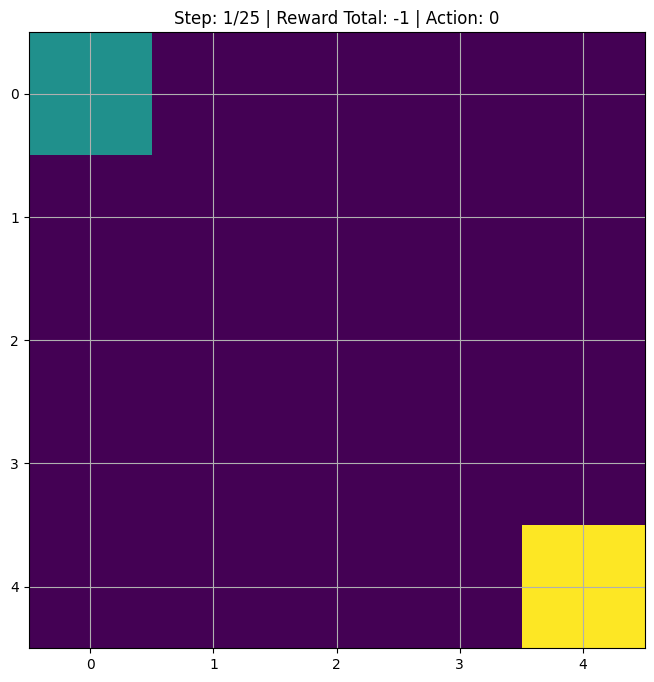


Résultats:
- Steps executés: 25
- Reward total: -25
- Goal atteint: Non


In [39]:

MAX_STEPS = 25  
DELAY = 0.1    

print(f"=== ANIMATION TEMPS RÉEL ===")
print(f"Nombre de steps: {MAX_STEPS}")
print(f"Délai entre steps: {DELAY}s")
print("Démarrage de l'animation...")


path, total_reward = run_animated_episode(env, agent, max_steps=MAX_STEPS, delay=DELAY)

print(f"\nRésultats:")
print(f"- Steps executés: {len(path)-1}")
print(f"- Reward total: {total_reward}")
print(f"- Goal atteint: {'Oui' if total_reward > 0 else 'Non'}")

Nombre de steps: 12


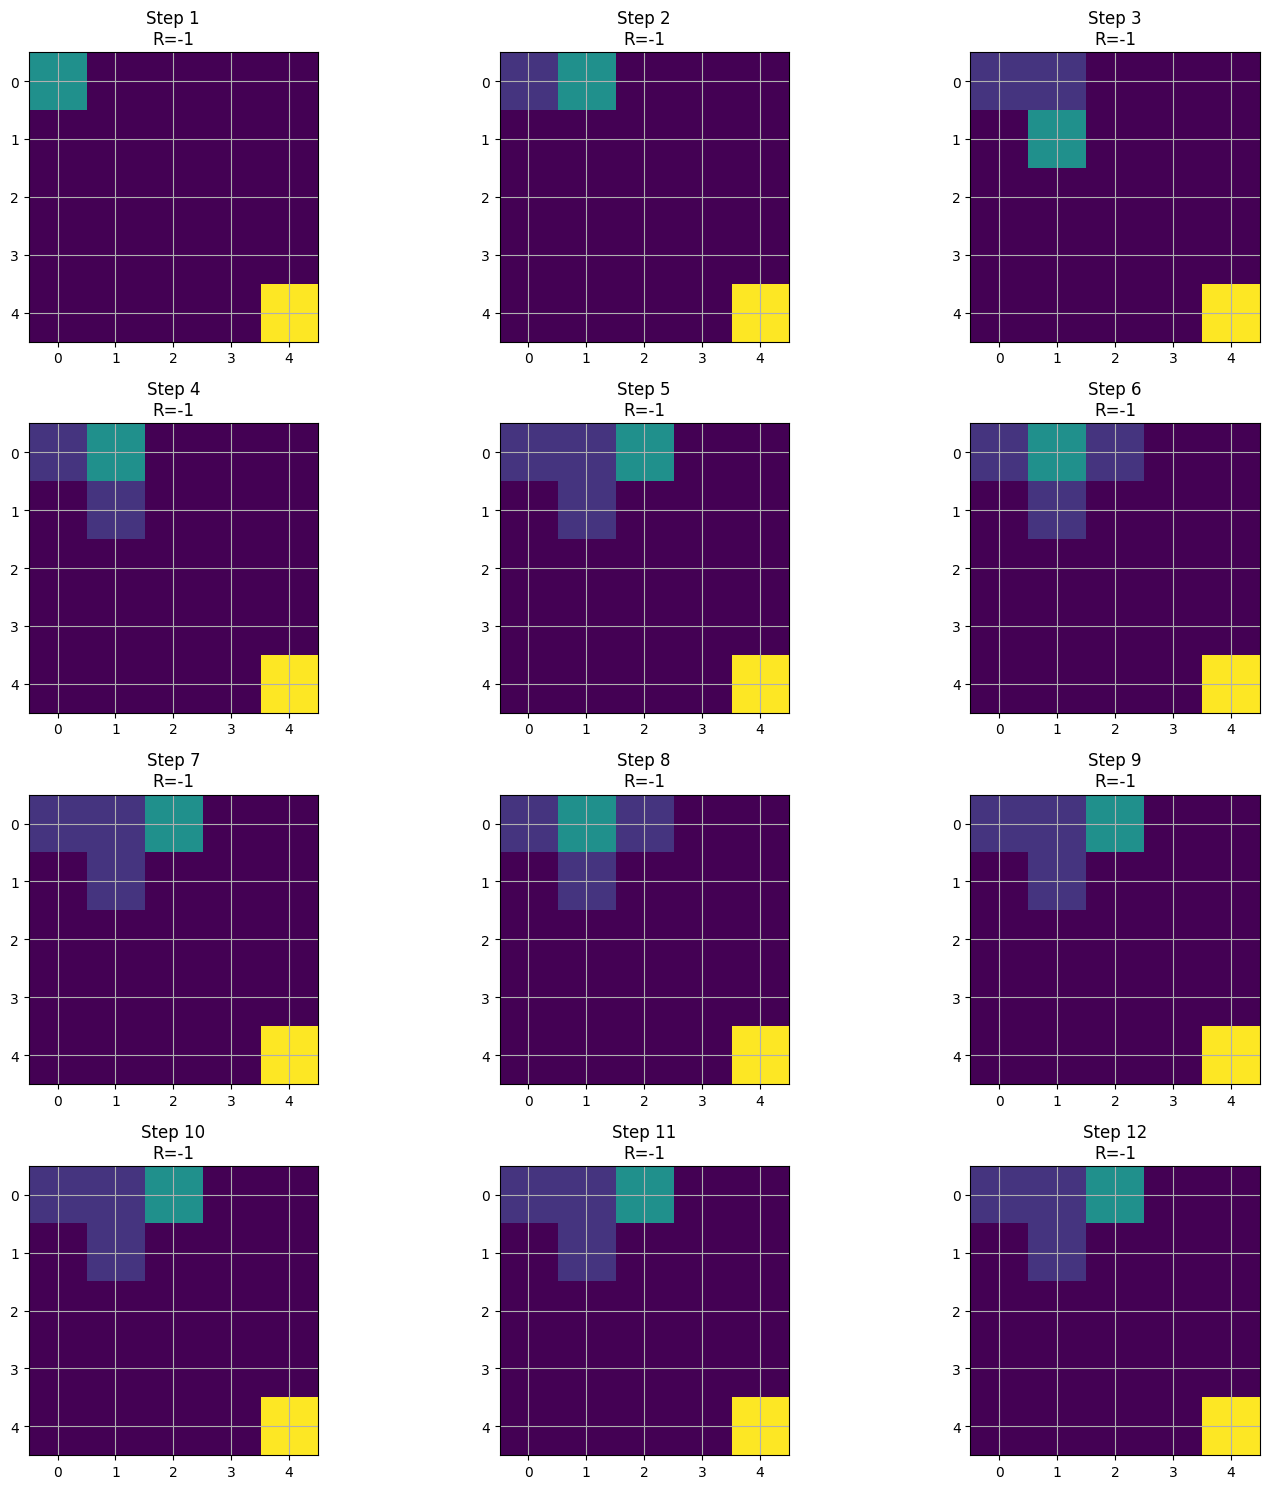


Résultats:
- Steps executés: 12
- Reward total: -12
- Chemin parcouru: 13 positions


In [42]:

GRID_STEPS = 12  


print(f"Nombre de steps: {GRID_STEPS}")


path, total_reward = create_step_by_step_plots(env, agent, max_steps=GRID_STEPS)

print(f"\nRésultats:")
print(f"- Steps executés: {len(path)-1}")
print(f"- Reward total: {total_reward}")
print(f"- Chemin parcouru: {len(path)} positions")

=== SIMULATION MULTI-ÉPISODES ===
Nombre d'épisodes: 20
Max steps par épisode: 200
Episode 1: Reward=-39, Steps=50, Done=True
Episode 6: Reward=-171, Steps=182, Done=True
Episode 11: Reward=-20, Steps=31, Done=True
Episode 16: Reward=-105, Steps=116, Done=True

=== STATISTIQUES FINALES ===
Épisodes réussis: 16/20 (80.0%)
Reward moyen: -79.65
Steps moyens: 88.45


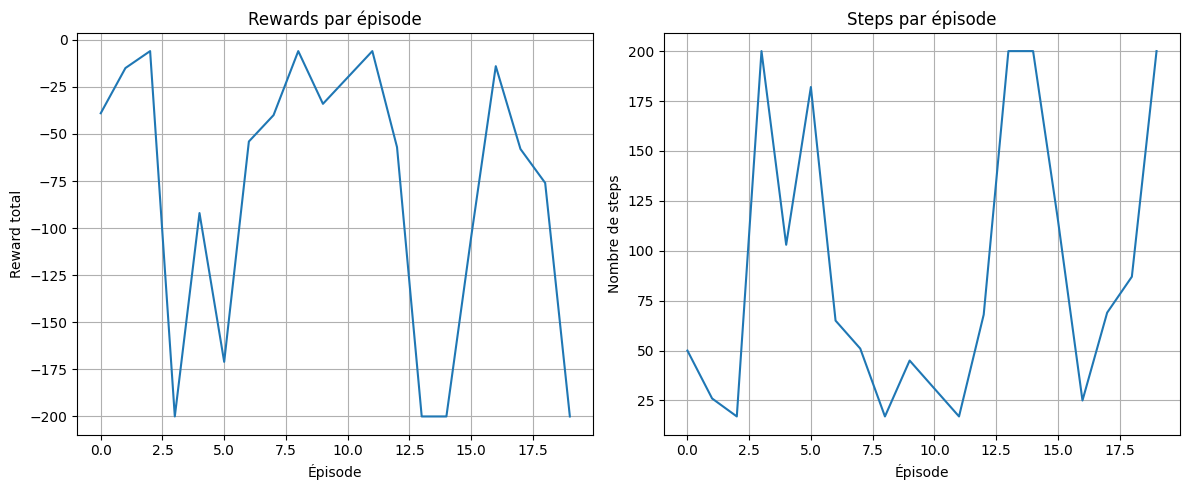

In [41]:

NUM_EPISODES = 20  
MAX_STEPS = 200   

print(f"=== SIMULATION MULTI-ÉPISODES ===")
print(f"Nombre d'épisodes: {NUM_EPISODES}")
print(f"Max steps par épisode: {MAX_STEPS}")


episode_rewards, episode_steps = run_multiple_episodes(
    env, agent, 
    num_episodes=NUM_EPISODES, 
    max_steps=MAX_STEPS
)